#### Import numpy, matplotlib.pyplot and make it inline

In [24]:
import math

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [25]:
x_points = np.linspace(0,20,50)
y_points = -2 * x_points + 1* np.ones(len(x_points))
learning_rate = 0.0001

In [26]:
print(x_points)
print(y_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivalent Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1

In [27]:
def batch_GD(x_data, y_data, lRate, max_iter):
    th0=0
    th1=0
    thetas0 = []
    thetas1 = []
    losses = []
    hypothesis = []
    epochs=0
    for i in range (max_iter):
        h = th0 + th1 * x_data
        gradientTh0 = (lRate/len(x_data))*sum(h- y_data)
        gradientTh1 = (lRate/len(x_data))*sum((h- y_data) * x_data)
        th0 = th0 - gradientTh0
        th1 = th1 - gradientTh1
        thetas0.append(th0)
        thetas1.append(th1)
        losses.append((1/2*len(x_data))*sum(h-y_data)**2)
        hypothesis.append(h)
        epochs+=1
        if math.sqrt(gradientTh0 ** 2 + gradientTh1 ** 2) < 0.001:
            break
    return thetas0,thetas1,losses,hypothesis,th0,th1,epochs

In [28]:
# batch_GD(x_points,y_points,learning_rate,1000)

#### Calculating r2 score

In [29]:
batch = batch_GD(x_points,y_points,learning_rate,1000)
y_pred= batch[4] + batch[5]*x_points
print(r2_score(y_points,y_pred))

0.9924366901232845


#### Plot loss vs. epochs

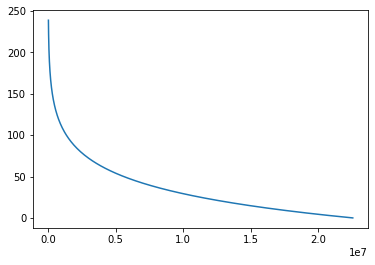

In [30]:
plt.plot(batch[2],list(range(batch[6])))
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

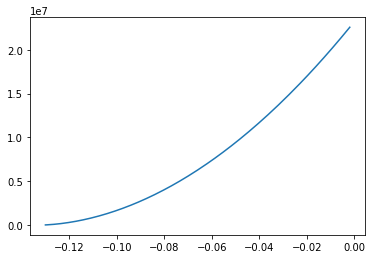

In [31]:
plt.plot(batch[0],batch[2])
plt.show()

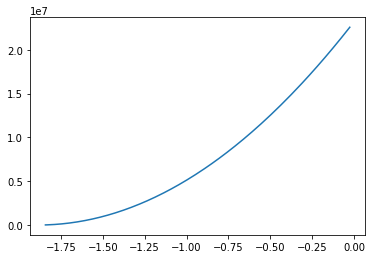

In [32]:
plt.plot(batch[1],batch[2])
plt.show()

#### Plot all regression lines till converge

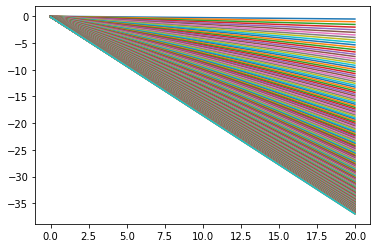

In [33]:
fig, ax = plt.subplots()
for i in range (len(batch[0])):
    predict = batch[0][i] + batch[1][i] * x_points
    ax.plot(x_points,predict)
plt.show()

#### Plot the best regression line

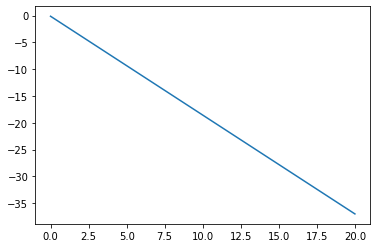

In [34]:
predict2 = batch[0][-1] + batch[1][-1] * x_points
plt.plot(x_points,predict2)
plt.show()

In [35]:
batch2 = batch_GD(x_points,y_points,0.01,1000)
y_pred2 = batch[4] + batch[5]*x_points
print(r2_score(y_points,y_pred2))

0.9924366901232845


#### Updating the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations

In [36]:
def mini_batch_GD(x_data, y_data, lRate, max_iter):
    th0=0
    th1=0
    thetas0 = []
    thetas1 = []
    losses = []
    hypothesis = []
    epochs=0
    for i in range (max_iter):
        for j in range(0,len(x_data),10):
            h = th0 + th1 * x_data[j:j+10]
            gradientTh0 = (lRate/10)*sum(h- y_data[j:j+10])
            gradientTh1 = (lRate/10)*sum((h- y_data[j:j+10]) * x_data[j:j+10])
            th0 = th0 - gradientTh0
            th1 = th1 - gradientTh1
            thetas0.append(th0)
            thetas1.append(th1)
            losses.append((1/2*len(x_data[j:j+10]))*sum(h-y_data[j:j+10])**2)
            hypothesis.append(h)
            epochs+=1
        if abs(losses[-1]-losses[-2]) < 0.001:
            break
    return thetas0,thetas1,losses,hypothesis,th0,th1,epochs

In [37]:
miniBatch = mini_batch_GD(x_points,y_points,learning_rate,1000)
y_pred= miniBatch[4] + miniBatch[5]*x_points
print(r2_score(y_points,y_pred))

0.9981236207233419


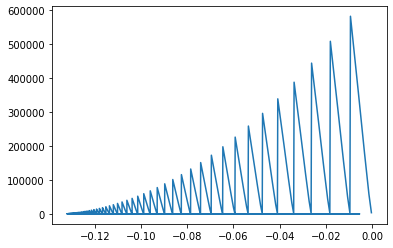

In [38]:
plt.plot(miniBatch[0],miniBatch[2])
plt.show()

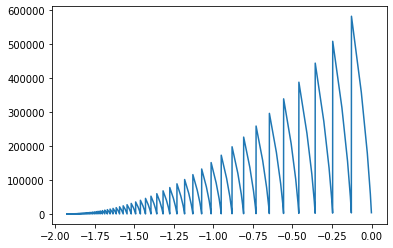

In [39]:
plt.plot(miniBatch[1],miniBatch[2])
plt.show()

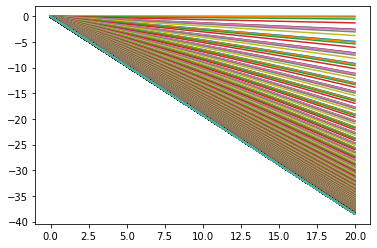

In [40]:
fig, ax = plt.subplots()
for i in range (len(miniBatch[0])):
    predict = miniBatch[0][i] + miniBatch[1][i] * x_points
    ax.plot(x_points,predict)
plt.show()

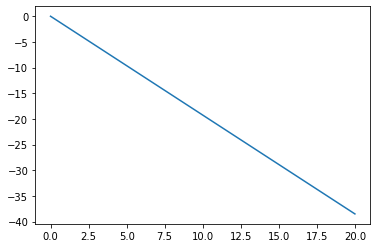

In [41]:
predict2 = miniBatch[0][-1] + miniBatch[1][-1] * x_points
plt.plot(x_points,predict2)
plt.show()

## Stochastic GD

#### Updating the implementation of the Batch GD to be Stochastic and repeating the above plots and evaluations

In [42]:
def stochastic_GD(x_data, y_data, lRate, max_iter):
    th0=0
    th1=0
    thetas0 = []
    thetas1 = []
    losses = []
    hypothesis = []
    epochs=0
    for i in range (max_iter):
        for j in range(0,len(x_data)):
            h = th0 + th1 * x_data[j]
            gradientTh0 = (lRate/10)*(h- y_data[j])
            gradientTh1 = (lRate/10)*((h- y_data[j]) * x_data[j])
            th0 = th0 - gradientTh0
            th1 = th1 - gradientTh1
            thetas0.append(th0)
            thetas1.append(th1)
            losses.append((1/2)*(h-y_data[j])**2)
            hypothesis.append(h)
            epochs+=1
        if abs(losses[-1]-losses[-2]) < 0.001:
            break
    return thetas0,thetas1,losses,hypothesis,th0,th1,epochs

In [43]:
stochastic = stochastic_GD(x_points,y_points,learning_rate,1000)
y_pred= stochastic[4] + stochastic[5]*x_points
print(r2_score(y_points,y_pred))

0.9981216793417702


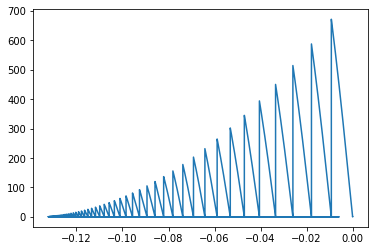

In [44]:
plt.plot(stochastic[0],stochastic[2])
plt.show()

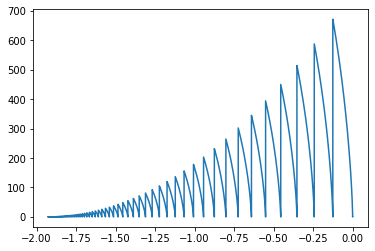

In [45]:
plt.plot(stochastic[1],stochastic[2])
plt.show()

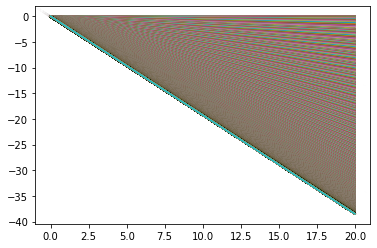

In [46]:
fig, ax = plt.subplots()
for i in range (len(stochastic[0])):
    predict = stochastic[0][i] + stochastic[1][i] * x_points
    ax.plot(x_points,predict)
plt.show()

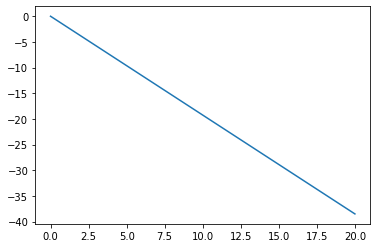

In [47]:
predict2 = stochastic[0][-1] + stochastic[1][-1] * x_points
plt.plot(x_points,predict2)
plt.show()